<a href="https://colab.research.google.com/github/Vavillayashu007/Stance-Detection-in-Tweets-using-Deep-Learning/blob/main/Stance_Detection_in_Tweets_Using_Deep_Learning(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
file_path = "https://alt.qcri.org/semeval2016/task6/data/uploads/semeval2016-task6-trainingdata.txt"
df = pd.read_csv(file_path, delimiter='\t', encoding='ISO-8859-1')

In [ ]:
print("Dataset Overview:")
df.head()

Dataset Overview:


,ID,Target,Tweet,Stance
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST
3,104,Atheism,Salah should be prayed with #focus and #unders...,AGAINST
4,105,Atheism,And stay in your houses and do not display you...,AGAINST


In [ ]:
print("Class Distribution:\n", df['Stance'].value_counts())

Class Distribution:
 Stance
AGAINST    1342
NONE        741
FAVOR       731
Name: count, dtype: int64


<ipython-input-7-e42068ba8a7a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Stance'], palette="Set2")


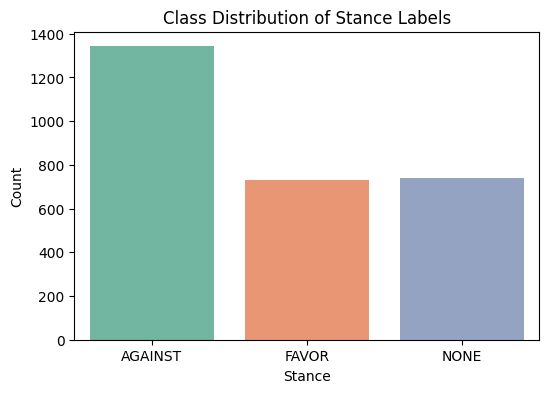

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Stance'], palette="Set2")
plt.title("Class Distribution of Stance Labels")
plt.xlabel("Stance")
plt.ylabel("Count")
plt.show()

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

df['clean_tweet'] = df['Tweet'].apply(preprocess_text)

In [ ]:
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 50


In [ ]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_tweet'])
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(df['clean_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

In [ ]:
stance_mapping = {'AGAINST': 0, 'FAVOR': 1, 'NONE': 2}
y = df['Stance'].map(stance_mapping).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
EMBEDDING_DIM = 100

model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes (AGAINST, FAVOR, NONE)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.4428 - loss: 1.0730 - val_accuracy: 0.4778 - val_loss: 1.0531
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.5034 - loss: 1.0080 - val_accuracy: 0.5648 - val_loss: 0.9599
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.8215 - loss: 0.4961 - val_accuracy: 0.5702 - val_loss: 1.0477
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.9499 - loss: 0.1635 - val_accuracy: 0.5560 - val_loss: 1.5768
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9866 - loss: 0.0537 - val_accuracy: 0.5879 - val_loss: 1.7547
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.9917 - loss: 0.0376 - val_accuracy: 0.5577 - val_loss: 2.3241
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.9953 - loss: 0.0133 - val_accuracy: 0.5542 - val_loss: 2.6414
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9971 - loss: 0.0106 - val_accuracy

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [ ]:
print("BiLSTM Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

BiLSTM Model Accuracy: 0.5452930728241563

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       269
           1       0.56      0.42      0.48       146
           2       0.38      0.37      0.38       148

    accuracy                           0.55       563
   macro avg       0.52      0.50      0.51       563
weighted avg       0.54      0.55      0.54       563



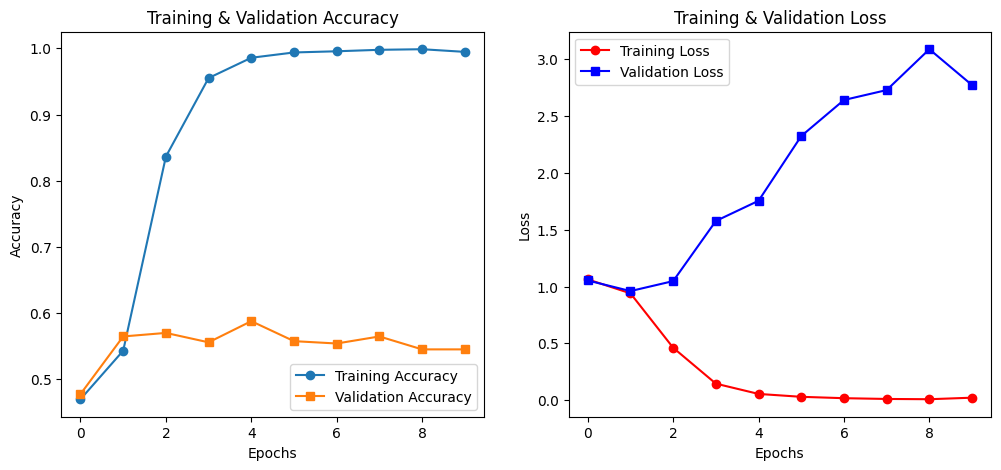

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss', marker='o', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()